# **Workshop 3**

In this workshop, you'll be exploring clustering methods.

# 0) Load the Data

In [1]:
import numpy as np

# Set the seed so our output is reproducable
np.random.seed(23)
from sklearn.metrics import pairwise_distances
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt

data_folder = './data'

Dataset 1 is of dimension (200, 2)
Dataset 1 is of dimension (200, 2)
Dataset 3 is of dimension (200, 2)


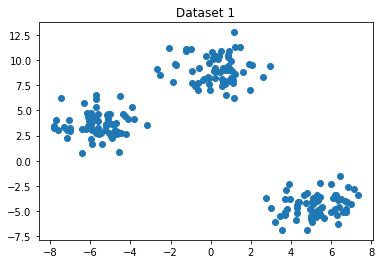

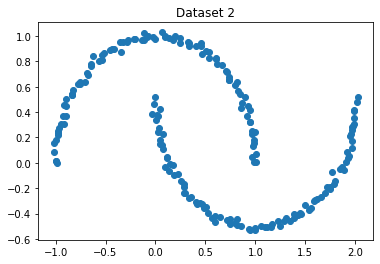

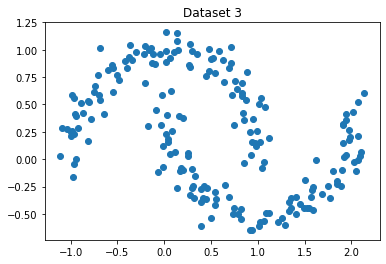

In [2]:
# First, let us load datasets to use for KMeans and Hierarchical Clustering
d1 = np.load(f'{data_folder}/hw4-p1-d1.npz')
dataset_1 = d1['data']
print(f'Dataset 1 is of dimension {dataset_1.shape}')
initial_centers = d1['initial']

d2 = np.load(f'{data_folder}/hw4-p1-d2.npz')
dataset_2 = d2['data']
print(f'Dataset 1 is of dimension {dataset_2.shape}')
initial_centers = d2['initial']

d3 = np.load(f'{data_folder}/hw4-p2-d2.npz')
dataset_3 = d3['data']
print(f'Dataset 3 is of dimension {dataset_2.shape}')

# plot the data 
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1])
plt.title('Dataset 1')
plt.show()

plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1])
plt.title('Dataset 2')
plt.show()

plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

# 1) Sum of Squared Error (SSE)
In this problem, you'll be implementing a way to caculate the SEE of a set of clusters.

### Example 1.1: Cluster SSE (Follow Along)
First, to decompose the problem, we'll write a function to calculate the SEE of a single cluster.

In [3]:
def calculate_cluster_sse(cluster_data):
    """
    Write code to calculate the SSE for the dataset 'data' given cluster assignments. 
    
    INPUT:
          data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
          
    OUTPUT:
          A floating point value containing the SSE of that cluster
    """
    cluster_centers = np.mean(cluster_data, axis=0)
    within_sse = np.sum(np.square(cluster_data - cluster_centers))
    
    return within_sse

In [4]:
# Test your code!
# assume we're creating a dataset with two clusters of 2D data objects
cluster1 = np.array([[0, 0], [1, 1]])
cluster2 = np.array([[2, 2], [3, 3] ,[4, 4]])

# Let's calculate its SSE
# Should be 1
print(f'Cluster1 SSE = {calculate_cluster_sse(cluster1)}')
# Should be 4
print(f'Cluster2 SSE = {calculate_cluster_sse(cluster2)}')
# So the total SSE should be 5

Cluster1 SSE = 1.0
Cluster2 SSE = 4.0


### Problem 1.2 Clustering SSE (Group Work)
Now, using the `calculate_cluster_sse` you wrote in order to calculate the SEE for a clustering assignment.

In [5]:
def calculate_sse(data, cluster_assignments):
    """
    Write code to calculate the SSE for the dataset 'data' given cluster assignments. 
    
    INPUT:
          data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
          cluster_assignments: a numpy integer vector containing the cluster assignments for each point in data.
                           It is of shape (n_attributes, ).
          
    OUTPUT:
          A floating point value containing the SSE     
    """
    clusters = np.unique(cluster_assignments)
    print(f'Unique clusters = {clusters}')
    final_SSE = 0
    for c in clusters:
        cluster_data = data[cluster_assignments == c, :]
        final_SSE  += calculate_cluster_sse(cluster_data)
    return final_SSE

     

Unique clusters = [0 1]
For given data, SSE = 5.0


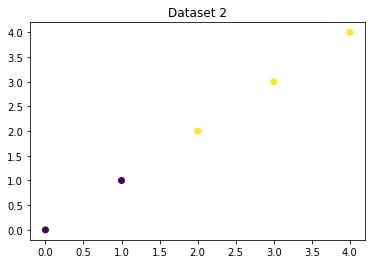

In [6]:
# Test your code!
# assume we're creating a dataset with two clusters 
practice_data = np.concatenate((cluster1, cluster2))
# here, 0 means that all points belong to cluster 0
# 1 means all points belong to cluster 1
practice_cluster_assignments = np.array([0, 0, 1, 1, 1]) 

# Let's calculate its SSE
print(f'For given data, SSE = {calculate_sse(practice_data, practice_cluster_assignments)}')
# should be 5 (1 for cluster1 + 4 for cluster2)

plt.scatter(x = practice_data[:, 0], y=practice_data[:, 1], c=practice_cluster_assignments)
plt.title('Dataset 2')
plt.show()

In [7]:
# More tests
# Let us reload the dataset for simplicity
test_d1 = np.load(f'{data_folder}/hw4-p1-practice.npz')
test_dataset_1 = d1['data']
test_initial_centers = d1['initial']
test_ds1_sse_result = calculate_sse(test_dataset_1, test_initial_centers)
test_ds1_sse_result
np.testing.assert_almost_equal(test_ds1_sse_result, 10594.837409523792)

Unique clusters = [0 1 2]


# 2) K-Means Clustering

In this problem, you will be using the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) sklearn **library** on dataset_1.

## Example 2.1: K-means Clustering (Follow)

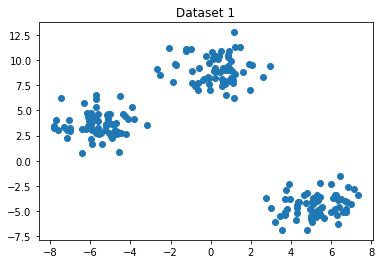

In [8]:
# Plot the data
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1])
plt.title('Dataset 1')
plt.show()

Perform a KMeans clustering on the above data. Set `n_clusters=3`. In addition, make note of what the other paramaters to the function do, even though you do not have to use them in your result.



In [9]:
kmeans = KMeans(n_clusters=3)

Then, use KMeans to fit the data. To get the labels that KMeans give the data, use `results.label_` (the underscore is important). 

In [10]:
#SOLUTIONS
results = kmeans.fit(dataset_1)
results.labels_

array([0, 1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 1, 1, 0, 0, 2, 2,
       0, 1, 2, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 1, 2, 1, 0,
       1, 1, 0, 2, 1, 0, 2, 2, 1, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0,
       2, 0, 0, 2, 1, 1, 2, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 0, 2, 2, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 2, 1, 0, 0, 2, 2, 0,
       0, 2, 1, 2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 0, 1, 2, 1, 2, 2, 1, 2, 0,
       0, 1, 2, 0, 2, 2, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       2, 1, 2, 2, 1, 2, 2, 2, 0, 0, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1,
       0, 2, 2, 2, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0, 2, 0, 1,
       0, 0])

Now, plot the data again, but this time color the clusters. `plt.scatter` can take in an additional paramater `c`, which will color the data points according to a series of numeric labels.

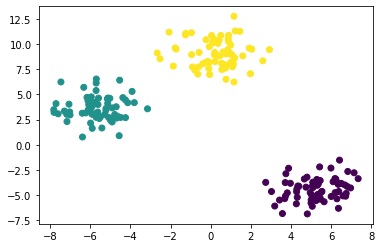

In [11]:
# Plot data here
plt.scatter(x = dataset_1[:, 0], y=dataset_1[:, 1], c=results.labels_)

In [12]:
# Calculate the SSE to make sure we did it right
sse = calculate_sse(dataset_1, results.labels_)
np.testing.assert_almost_equal(sse, 529.2865169916909)

Unique clusters = [0 1 2]


## Problem 2.2: Choosing K

### Elbow Method  (Group Work)



Use this to create function that takes in a dataset and a maximum k value, and returns a list of the respective inertia scores for each K. 

Then calculate the inertia scores from those inertia scores, and use the elbow method to verify what the best value for `k` is.

In [13]:
def get_elbow_data(data, k_max):
    """
    Write code to generate a list of SSEs for each corresponding K-means clustering of size k.
    
    INPUT:
        data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
        k_max: an integer representing the maximum number of clusterings to perform in K-means clustering.
        
    OUTPUT:
        A list of SSE scores of length k: where SSE[k] is the SSE score of a K-means clustering with k clusters.
    
    """
    kmeanarr = {}
    for i in range(k_max):
        kmeans = KMeans(n_clusters=i+1)
        results = kmeans.fit(data)
        kmeanarr[results] = calculate_sse(data, results.labels_)
        
    return list(kmeanarr.values())


In [14]:
# Checking out output values
sse_values = get_elbow_data(dataset_1, 10)
sse_values

Unique clusters = [0]
Unique clusters = [0 1]
Unique clusters = [0 1 2]
Unique clusters = [0 1 2 3]
Unique clusters = [0 1 2 3 4]
Unique clusters = [0 1 2 3 4 5]
Unique clusters = [0 1 2 3 4 5 6]
Unique clusters = [0 1 2 3 4 5 6 7]
Unique clusters = [0 1 2 3 4 5 6 7 8]
Unique clusters = [0 1 2 3 4 5 6 7 8 9]


[10630.707452194421,
 2679.249633218189,
 529.2865169916909,
 443.95082561325665,
 380.518326382679,
 319.5962991039757,
 284.9737331217999,
 250.53191135576475,
 220.67191919600273,
 202.98198322319797]

In [15]:
# Tests to make sure the SSE values are right
np.testing.assert_almost_equal(sse_values[0], 10630.707452194421)
np.testing.assert_almost_equal(sse_values[1], 2679.249633218189)

Text(0, 0.5, 'SSE')

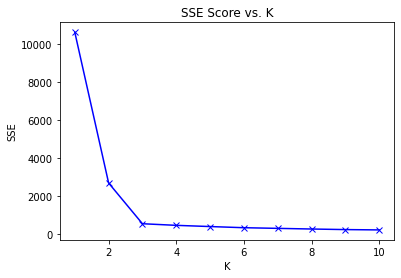

In [16]:
# You can use this code to plot an elbow plot
plt.plot(range(1, 11), sse_values, 'bx-')
plt.title("SSE Score vs. K")
plt.xlabel("K")
plt.ylabel("SSE")

Does the elbow plot match up to your intution?

### Example 2.3 Silhouette Score (Follow)

Now let's do a different method for trying to select K, the silhouette score.

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
# Same procedure, but with the silhouette score
cluster1 = np.array([[0, 0], [1, 1]])
cluster2 = np.array([[2, 2], [3, 3] ,[4, 4]])

practice_data = np.concatenate((cluster1, cluster2))
practice_cluster_assignments = np.array([0, 0, 1, 1, 1]) 

score = silhouette_score(practice_data, practice_cluster_assignments)

In [19]:
score

0.46761904761904755

In [20]:
#Lets test if it's right
np.testing.assert_almost_equal(score, 0.46761904761904755)

In [21]:
def get_silhouettes(data, k_max):  
    silhouettes = []
    """
    Write code to generate a list of SSEs for each corresponding K-means clustering of size k.
    
    INPUT:
        data: the dataset of size (n_samples, n_attributes) where n_samples is the number of samples
                and n_attributes is the number of attributes for each data point.
        k_max: an integer representing the maximum number of clusterings to perform in K-means clustering.
        
    OUTPUT:
        A list of silhouette scores of length k: where SSE[k] is the SSE score of a K-means clustering with k clusters.
    
    """
    K = range(2,10)
    for k in K:
        kmeans = KMeans(n_clusters=k)
        results = kmeans.fit(data)
        # Now add the Silhouette score!
        silhouettes.append(silhouette_score(data, results.labels_))
        
    return silhouettes


Let's check it for our test data again

In [22]:
silhouette_scores = get_silhouettes(dataset_1, 10)
silhouette_scores

[0.7059292827768441,
 0.777067083432506,
 0.6613033849857757,
 0.4873883401411674,
 0.3480403097952234,
 0.34939911632369186,
 0.34771759091868104,
 0.35785038305844524]

Text(0, 0.5, 'Silhouette Score')

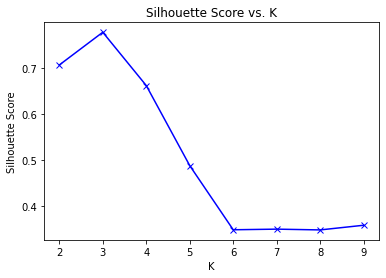

In [23]:
# Let's plot it
plt.plot(range(2, 10), silhouette_scores, 'bx-')
plt.title("Silhouette Score vs. K")
plt.xlabel("K")
plt.ylabel("Silhouette Score")

Does the suggested value for K via the silhouette score match up?

### Problem 2.4: Choosing k on Real Data (Group Work)

This dataset is the result of a chemical analysis of different wines in the same region of Italy, but from different cultivars. Unfortunantly, there was a mix-up during planting season and nobody remembers how many cultivars there actually were!  

**Your job is to figure out how many types of cultivars the wine was sampled from, and which wines belong to which cultivars.** (Don't spoil the answer if you already know!)

First, let's load up the data.

In [24]:
# Load the data
# Read the wine dataset and translate to pandas dataframe
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler

wine_sk = datasets.load_wine()

# Make sure data is in the same range
wine_sk.data = MinMaxScaler().fit_transform(wine_sk.data)
import pandas as pd

# Note that the "target" attribute is species, represented as an integer
wine_data = pd.DataFrame(data= np.c_[wine_sk['data']],columns= wine_sk['feature_names'])

In [25]:
wine_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


First, let's generate a scatter matrix to see if there are any obvious groupings. (Generating it might take a while)

You can **double click** the output picture to enlarge it.

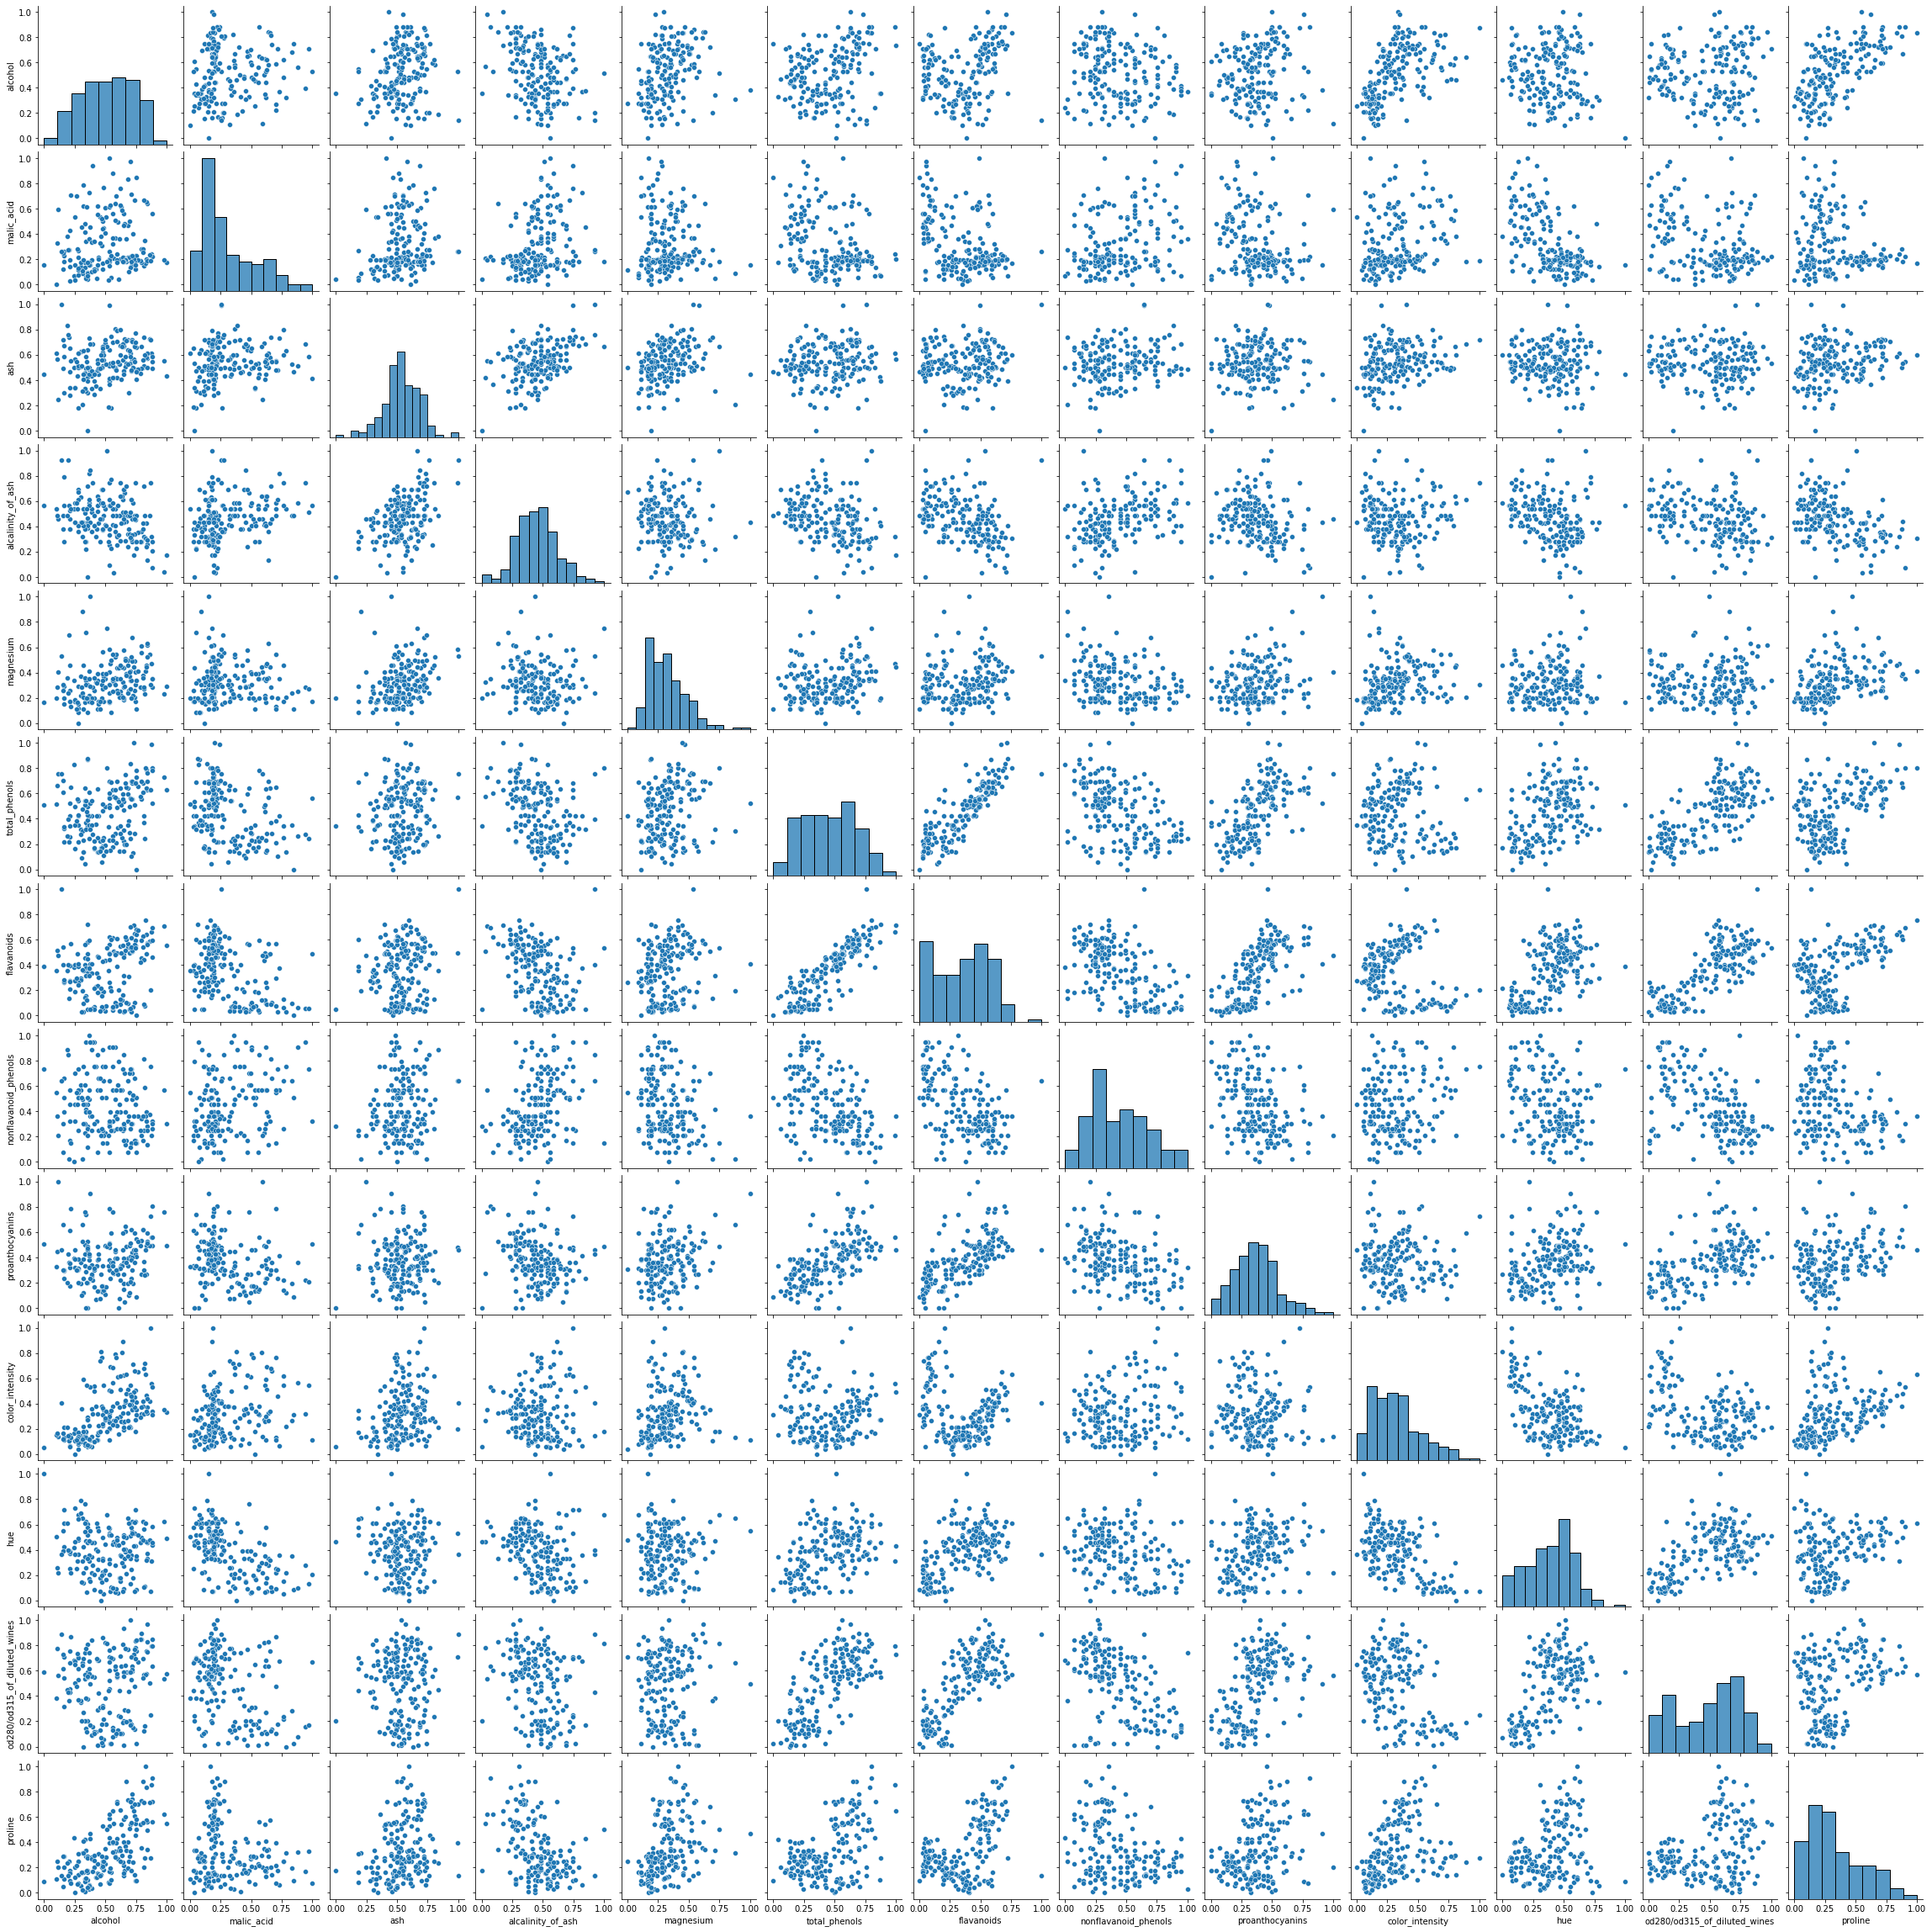

In [26]:
import seaborn as sns
sns.color_palette("bright")
sns.pairplot(wine_data)

### Backup scatter matrix code if seaborn isn't installed. Not as pretty as seaborn's though
#scatter_matrix = pd.plotting.scatter_matrix(wine_data.drop(columns=["target"]), figsize=(15,15))

Hmmm, doesn't look like there's any obvious groupings. What if we do some dimensionality reduction - maybe something will jump out?

Text(0.5, 1.0, 'PCA of Wine Data')

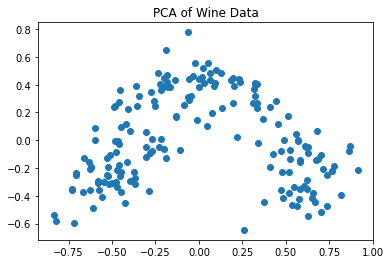

In [27]:
# Import PCA
from sklearn.decomposition import PCA

# Keep track of our data
X = wine_sk.data

#Choose number of components
pca = PCA(n_components=2)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)

# Plot the results
plt.scatter(transformed_X[:, 0], transformed_X[:, 1])
plt.title("PCA of Wine Data")

Alright, looks like the PCA doesn't really tell us anything either. Time to do some clustering.

**Use the elbow method and silhoutte score to find a good value of K for K-means.**

In [28]:
# Elbow method
sse_values = get_elbow_data(transformed_X, 10)
sse_values

Unique clusters = [0]
Unique clusters = [0 1]
Unique clusters = [0 1 2]
Unique clusters = [0 1 2 3]
Unique clusters = [0 1 2 3 4]
Unique clusters = [0 1 2 3 4 5]
Unique clusters = [0 1 2 3 4 5 6]
Unique clusters = [0 1 2 3 4 5 6 7]
Unique clusters = [0 1 2 3 4 5 6 7 8]
Unique clusters = [0 1 2 3 4 5 6 7 8 9]


[57.091887505717125,
 26.138387800829022,
 10.771762804100014,
 8.049524826741864,
 6.326336982701048,
 5.16472858914522,
 4.46367890636126,
 3.9591167929388815,
 3.538633229905955,
 3.054828892527585]

In [29]:
# Silhouette score
silhouette_scores = get_silhouettes(transformed_X, 10)
silhouette_scores

[0.4926692564158775,
 0.5680591392935428,
 0.4901590386140554,
 0.45912412496270805,
 0.4083913593577899,
 0.38713984872793417,
 0.38411597936256486,
 0.3719271943853177]

**Do the Elbow Method and Silhouette Score agree?**

Now, run the KMeans with your best choice of K.

In [30]:
k = 3
kmeans = KMeans(n_clusters=k)
results = kmeans.fit(wine_sk.data)
results.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

Alright, let's now plot the PCA, but with our colorings generated by K-means.

Text(0.5, 1.0, 'PCA of K-Means Clustering')

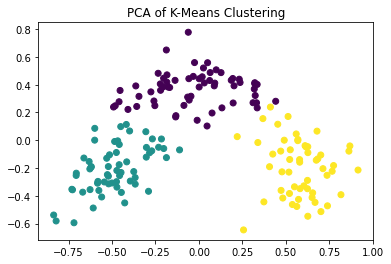

In [31]:
plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c = results.labels_)
plt.title("PCA of K-Means Clustering")

Now, let's see how many *actual* cultivars there were, and their ground truth class labels!

There were 3 cultivars


Text(0.5, 1.0, 'PCA of Ground Truth Groupings')

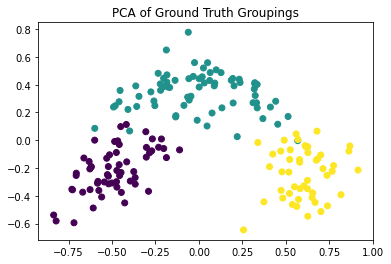

In [32]:
# Plot the results
Y = wine_sk.target
print("There were "+str(len(np.unique(wine_sk.target)))+" cultivars")

plt.scatter(transformed_X[:, 0], transformed_X[:, 1], c = Y)
plt.title("PCA of Ground Truth Groupings")

#### Does your K-means clustering agree? How do they differ? Is it okay that the cluster colors don't match up? Discuss in your group.

**Note your discussion here.** We started with 5 went down to 3 though the overlap didn't seem to chase but the coloring was more accurate. 

### Vizualizing the data using t-SNE (Bonus)

Another dimensionalty reduction technique that's used in practice is [**t-SNE**](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) (t-distributed Stochastic Neighbor Embedding). 

How t-SNE works is outside the scope of this course, but in practice it tends to do a better job of vizualizing high-dimensional datasets into very low (i.e. 2 or 3) dimensions than PCA. 

Here's the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) for t-SNE. 

The output of t-SNE is **non-deterministic**, so you will get different embeddings accross multiple runs.

C:\Users\comm_\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\comm_\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 1.0, 't-SNE of Wine Data')

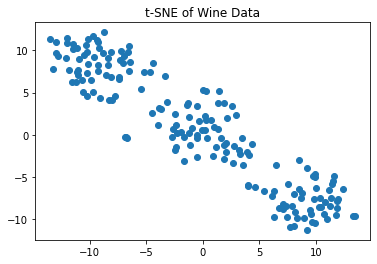

In [33]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(X)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1])
plt.title("t-SNE of Wine Data")

#### Does the t-SNE data tell you anything that the PCA didn't? Discuss.

**Note your discussion here.**

# 3) Agglomerative Hierarchical Clustering

Now, we're going to try Agglomerative Clustering, using the [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) library from sklearn.

First, take a look at the data we're trying to cluster.

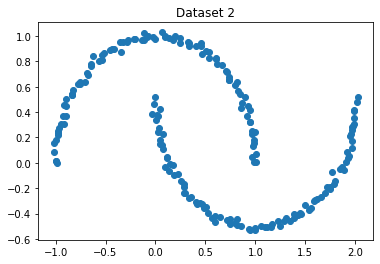

In [34]:
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1])
plt.title('Dataset 2')
plt.show()

### Example 3.1: Trying K-means (Follow)
Try a K-means on this dataset with `n_clusters=2` and the rest of the same paramaters used previously

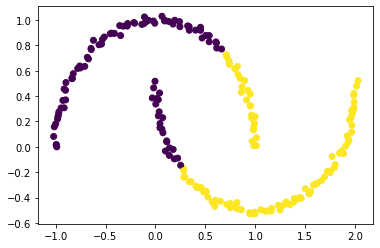

In [35]:
# Follow along by typing this code
kmeans = KMeans(n_clusters=2)
results = kmeans.fit(dataset_2)
plt.scatter(x = dataset_2[:, 0], y=dataset_2[:, 1], c=results.labels_)

### Problem 3.2: Agglomerative Clustering (Group)
Use the agglomerative clustering on this dataset with `n_clusters=2`. Try it with both `complete` and `single` linkage.

After each clustering, caculate the SSE for both single and complete and compare them.

In [36]:
# First do single link
agg = AgglomerativeClustering(n_clusters=2, linkage='single')
results = agg.fit(dataset_2)

In [37]:
agg1 = AgglomerativeClustering(n_clusters=2, linkage='complete')
results1 = agg1.fit(dataset_2)

In [38]:
#Now check the SSE of single link
sse = calculate_sse(dataset_2, results.labels_)
display(sse)

Unique clusters = [0 1]


121.76952070250866

In [39]:
sse = calculate_sse(dataset_2, results1.labels_)
display(sse)

Unique clusters = [0 1]


81.53911094739291

#### Which clustering method is more appropriate, single or complete link? Which has the lower SSE value? What does this tell us?

**Note your discussion here**

### Example 3.3: Dendrogram (Follow)

SKlearn doesn't have a built in method for dendograms, so we'll be using [scipy's dendrogram tool](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

Let's try the dendrogram on the dataset we had above.

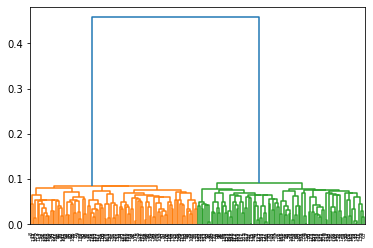

In [40]:
import scipy.cluster.hierarchy as hierarchy

# Note the method='single'
Z = hierarchy.linkage(dataset_2, method='single')
hierarchy.dendrogram(Z)
plt.show()

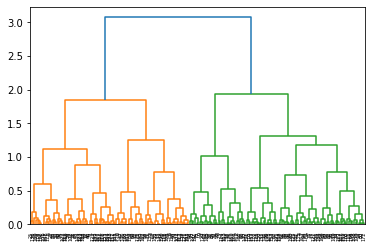

In [41]:

# Note the method='complete'
Z = hierarchy.linkage(dataset_2, method='complete')
hierarchy.dendrogram(Z)
plt.show()

### Interpreting the dendrograms
With the single link there is a large vertical distance between the two main clusters and all the subclusters is a good sign and signifies that the clusters are distinct. Compare that to the complete linkage clustering, where it seems that every linkage is at an equal distance, which doesn't signify that the clusters are that distinct.

### Problem 3.4: Dendograms and Wine Clustering (Group)

Now, let's go back to our wine dataset, view both the single and complete dendrograms on the dataset.

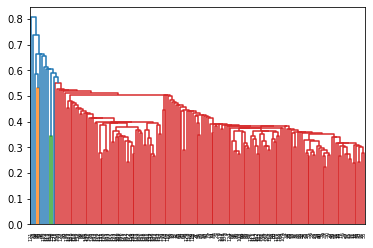

In [42]:
#Single link dendrogram
Z = hierarchy.linkage(wine_data, method='single')
hierarchy.dendrogram(Z)
plt.show()

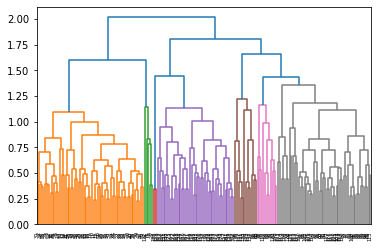

In [43]:
#Complete link dendrogram
Z = hierarchy.linkage(wine_data, method='complete')
hierarchy.dendrogram(Z)
plt.show()

#### By looking at the dendrograms, and using what you know now about how many clusters there should be, predict which algorithm you think performed better. Explain why you predicted that way.

**Discus

Now, try both complete and single link clustering, and plot the results using PCA like you did with Kmeans.

Now, check the results by performing PCA and coloring by the labels like you did with K-means.

Text(0.5, 1.0, 'PCA of Wine Data')

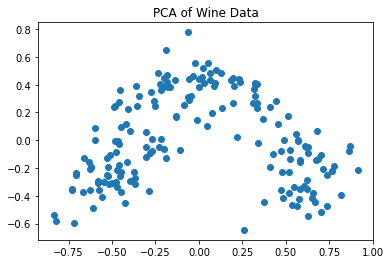

In [61]:
# Single
from sklearn.decomposition import PCA

# Keep track of our data
X = wine_sk.data

#Choose number of components
pca = PCA(n_components=2)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)

# Plot the results
plt.scatter(transformed_X[:, 0], transformed_X[:, 1])
plt.title("PCA of Wine Data")

In [45]:
# Complete

Which method worked better?

# 4) DBSCAN
Now we'll look at a datset where neither K-means nor Agglomerative Clustering does well.

### Example 4.1: Limitations of k-means and hierarchical clustering (Group)

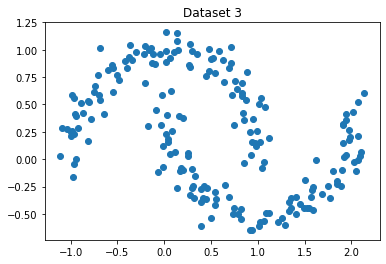

In [46]:
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1])
plt.title('Dataset 3')
plt.show()

#### Trying K-means
Try a K-means on this dataset with `n_clusters=2` and the rest of the same paramaters used previously

Initialization complete
Iteration 0, inertia 188.644204803116
Iteration 1, inertia 102.16121603463458
Iteration 2, inertia 92.06904444928966
Iteration 3, inertia 89.50560406886325
Iteration 4, inertia 88.0401372965889
Iteration 5, inertia 87.00843623870112
Iteration 6, inertia 86.57036051483266
Iteration 7, inertia 86.48506094185389
Iteration 8, inertia 86.46726267820057
Converged at iteration 8: strict convergence.


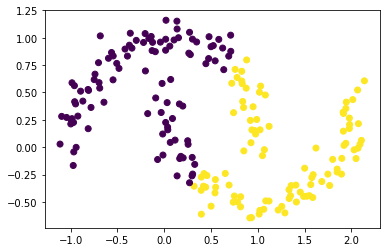

In [47]:
# Try K-means
kmeans = KMeans(n_clusters=2, init='random', n_init=1, max_iter=10, verbose=1)
results = kmeans.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

#### Trying Agglomerative
Try a agglomerative clustering on this dataset with `n_clusters=2`. Try it with both `complete` and `single` linkage.

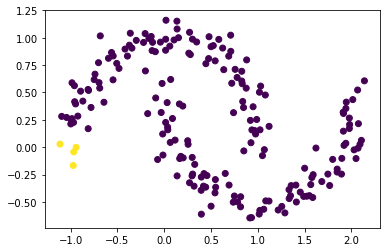

In [48]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage="single")
results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

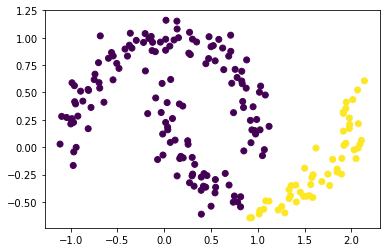

In [49]:
# Try agglomerative clustering
agglom = AgglomerativeClustering(n_clusters=2, linkage="complete")
results = agglom.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

### Problem 4.2: DBSCAN
[Here is the sklearn documentation for DBSCAN.](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) 

As discussed in class, finding the right number for `eps` and `min_samples` (min points) can be a bit touchy. **A good rule of thumb is to choose `min_samples` to be twice the dimension of the feature space.**

We'll be using the method discussed in class to determine a good way to determine and `eps` for a given `min_samples`. That is, if `min_samples=k`, plot the distance from each point to it's kth nearest neighbor. Then, sort those distances and plot them. Finally, locate on the graph where the sharpest change begins, and use that distance as your `eps`. You might have to play with values near that to get a good clustering.

### Problem 4.2.1: Selecting Values for DBSCAN (Follow)


Text(0, 0.5, 'Distance to 4th Nearest Neighbor')

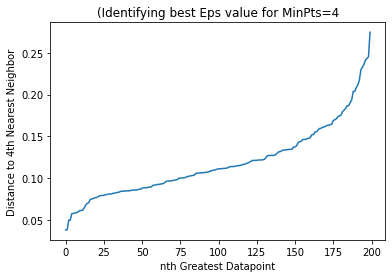

In [50]:
from sklearn.neighbors import NearestNeighbors

# Since we're in 2D, we have min points be 2*2=4
min_pts = 4
#Get the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_pts).fit(dataset_3)
distances, indices = neighbors.kneighbors(dataset_3)
#Sort them
dis_to_nth_nn = sorted(distances[:,min_pts-1])
#Plot
plt.plot(dis_to_nth_nn)
plt.title(f'(Identifying best Eps value for MinPts={min_pts}')
plt.xlabel("nth Greatest Datapoint")
plt.ylabel(f'Distance to {min_pts}th Nearest Neighbor')

As we can see, the sharpest cange begins at around the 175th greatest datapoint, which corresponds to a value of around `0.15`. So that can serve as a starting point for trying out different `eps` values.

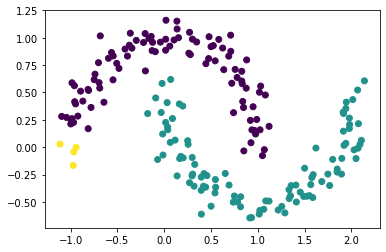

In [51]:
#Try with different eps from 0.15-0.22. 0.21 seems to be the best
dbscan = DBSCAN(eps=0.21, min_samples=min_pts)
results = dbscan.fit(dataset_3)
plt.scatter(x = dataset_3[:, 0], y=dataset_3[:, 1], c=results.labels_)

In [52]:
results.labels_

array([0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0], dtype=int64)

### Problem 4.2.2: DBSCAN on the Wine Dataset (Group)
Now let's try the same prodcedure on a more complex dataset. Choose a `minpoints`, then use that to find a good `eps`. Perform DBSCAN, and then plot your clusters with PCA like you did before. (It might not end up looking good, or working that well at even that...)

Text(0, 0.5, 'Distance to 26th Nearest Neighbor')

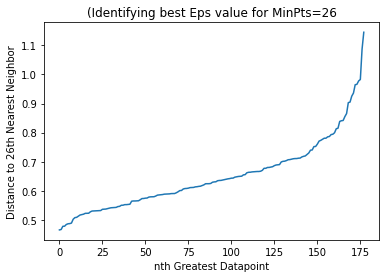

In [74]:
from sklearn.neighbors import NearestNeighbors
# Find and sort the nearest neighbors and plot the knee graph
# Since we're in 2D, we have min points be 2*2=4
min_pts = 26
#Get the nearest neighbors
neighbors = NearestNeighbors(n_neighbors=min_pts).fit(wine_data)
distances, indices = neighbors.kneighbors(wine_data)
#Sort them
dis_to_nth_nn = sorted(distances[:,min_pts-1])
#Plot
plt.plot(dis_to_nth_nn)
plt.title(f'(Identifying best Eps value for MinPts={min_pts}')
plt.xlabel("nth Greatest Datapoint")
plt.ylabel(f'Distance to {min_pts}th Nearest Neighbor')

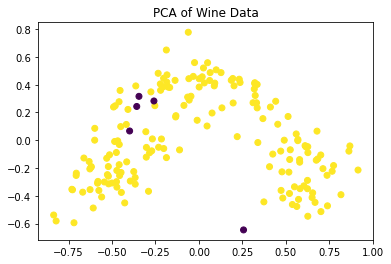

In [134]:
# Perform the DBSCAN and then plot the results on a PCA, like you did with Kmeans. Try different values of EPS.
dbscan = DBSCAN(eps=0.7, min_samples=26)
results = dbscan.fit(wine_data)
# Import PCA
from sklearn.decomposition import PCA

# Keep track of our data
X = wine_sk.data

#Choose number of components
pca = PCA(n_components=10)

#Calculate PCA
pca.fit(X)

#Get PCA version of fitted data
transformed_X = pca.transform(X)
results = dbscan.fit(transformed_X)
# Plot the results
plt.title("PCA of Wine Data")
plt.scatter(x = transformed_X[:, 0], y=transformed_X[:, 1], c=results.labels_)


What are your results? Why do you think DBSCAN failed in this case?

***Note your discussion here*** It failed due to to many features. Smaller features and more clustered 